In [3]:
# Part 1: Data Loading and Basic Exploration

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 150

# Load first 50 rows and only necessary columns
cols_to_use = ["title", "abstract", "publish_time", "journal", "source_x"]
df = pd.read_csv("metadata.csv", usecols=cols_to_use, nrows=50)


print("First 5 rows:")
display(df.head(5))

# Check the shape (number of rows and columns)
print("\nDataFrame shape:", df.shape)  # (rows, columns)


print("\nColumn data types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())



First 5 rows:


,source_x,title,abstract,publish_time,journal
0,PMC,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,2001-07-04,BMC Infect Dis
1,PMC,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,2000-08-15,Respir Res
2,PMC,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,2000-08-25,Respir Res
3,PMC,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,Respir Res
4,PMC,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,Respir Res



DataFrame shape: (50, 5)

Column data types:
source_x        object
title           object
abstract        object
publish_time    object
journal         object
dtype: object

Missing values per column:
source_x        0
title           0
abstract        1
publish_time    0
journal         0
dtype: int64


In [9]:
# Handle missing data
print("Missing values in key columns:")
print(df[['title', 'abstract', 'publish_time', 'journal']].isnull().sum())
cleaned_df = df.dropna(subset=['title', 'publish_time']).copy()

# Convert date and extract year
cleaned_df['publish_time'] = pd.to_datetime(cleaned_df['publish_time'], errors='coerce')
cleaned_df['year'] = cleaned_df['publish_time'].dt.year

# Create abstract word count
cleaned_df['abstract_word_count'] = cleaned_df['abstract'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

print(f"Original dataset: {df.shape}")
print(f"Cleaned dataset: {cleaned_df.shape}")


Missing values in key columns:
title           0
abstract        1
publish_time    0
journal         0
dtype: int64
Original dataset: (50, 5)
Cleaned dataset: (50, 7)


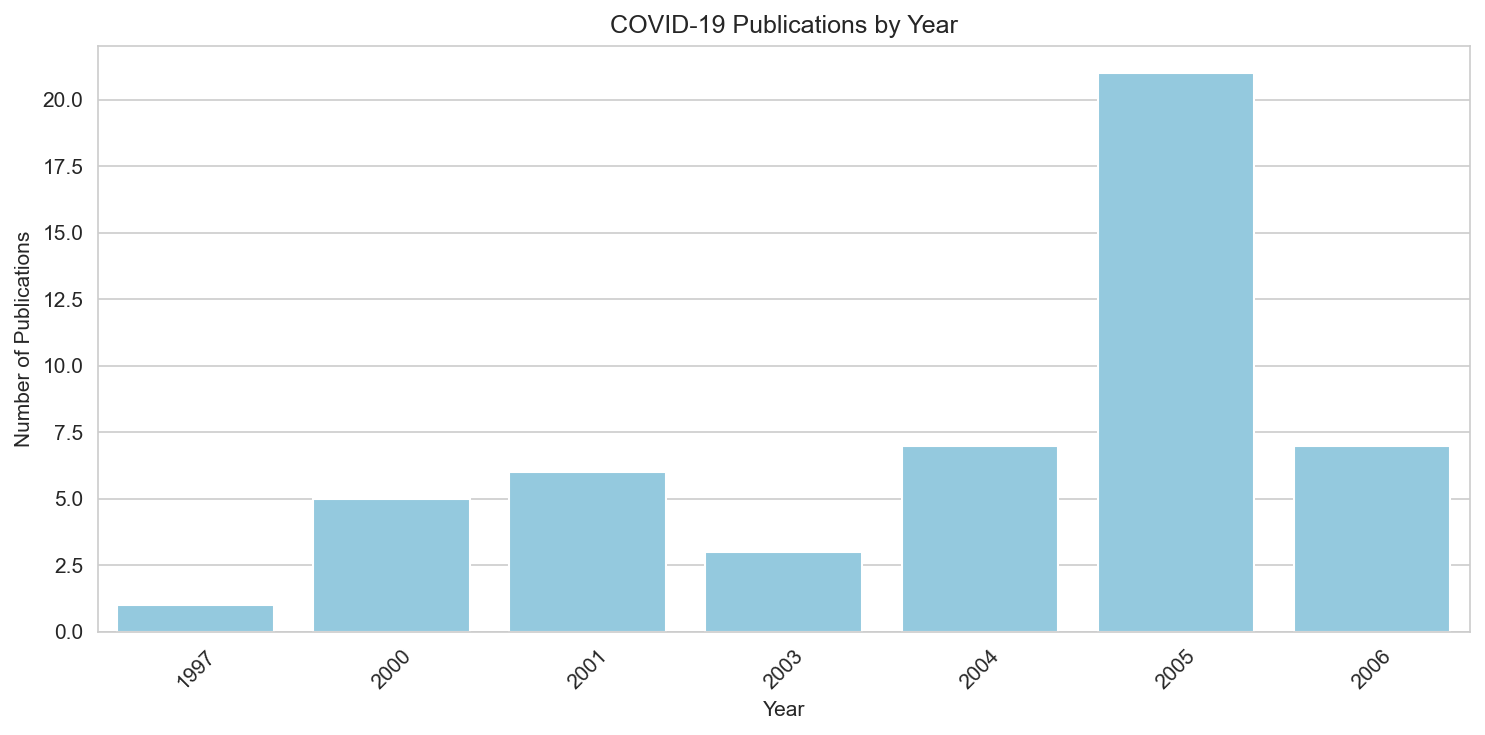

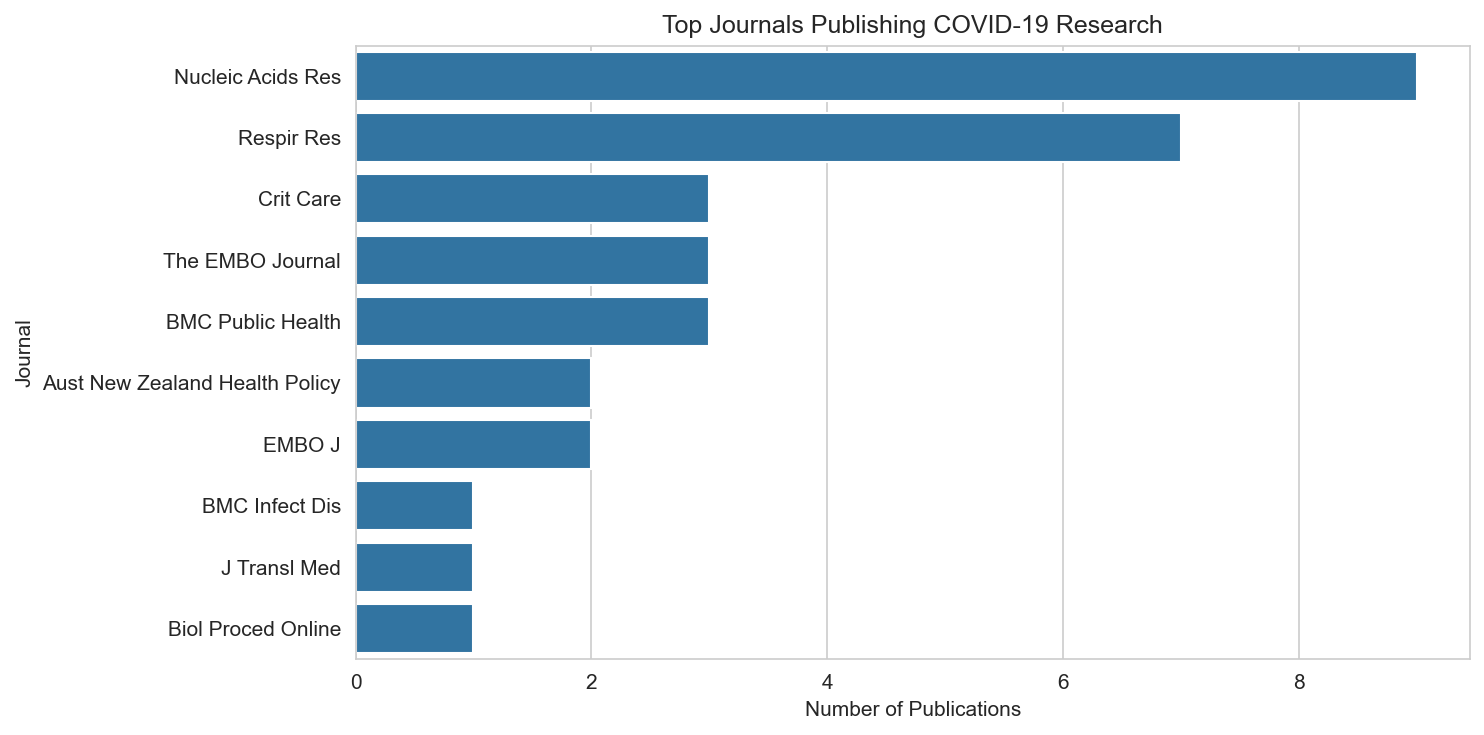

Most common words in titles:
of: 36
in: 21
a: 17
and: 17
the: 15
to: 10
rna: 9
for: 8
virus: 6
an: 6


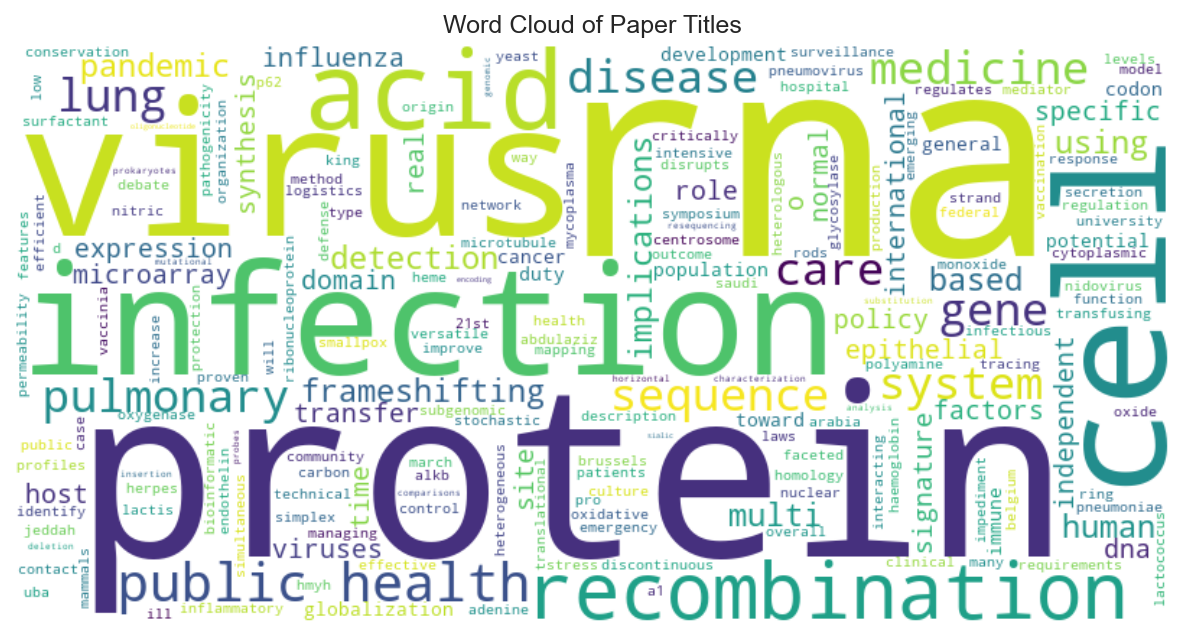

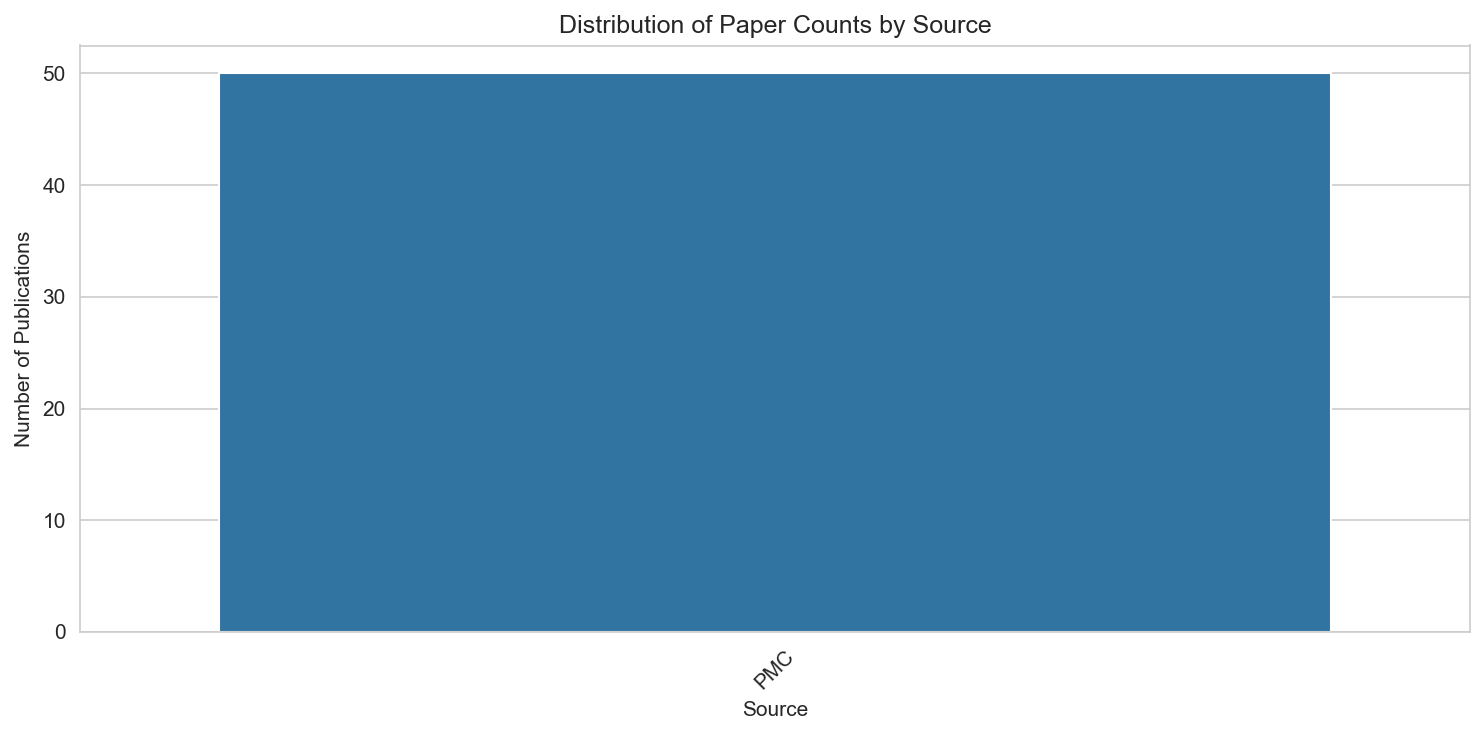

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re


# Publications over time
year_counts = cleaned_df["year"].value_counts().sort_index()  
plt.figure(figsize=(10, 5))
sns.barplot(x=year_counts.index, y=year_counts.values, color="skyblue")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.title("COVID-19 Publications by Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Top journals
top_journals = df["journal"].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_journals.index, x=top_journals.values, hue=None, legend=False)
plt.xlabel("Number of Publications")
plt.ylabel("Journal")
plt.title("Top Journals Publishing COVID-19 Research")
plt.tight_layout()
plt.show()

#  Most Frequent Words in Titles

titles = df["title"].dropna().str.lower().str.cat(sep=" ")
words = re.findall(r'\b\w+\b', titles)
common_words = Counter(words).most_common(10)
print("Most common words in titles:")
for word, count in common_words:
    print(f"{word}: {count}")

#  Word cloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Paper Titles")
plt.show()

# Distribution by Source

source_counts = df["source_x"].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=source_counts.index, y=source_counts.values, hue=None, legend=False)
plt.xlabel("Source")
plt.ylabel("Number of Publications")
plt.title("Distribution of Paper Counts by Source")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


